In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from ipywidgets import interact, IntSlider
from scipy import signal

In [2]:
dp = "C:/Users/wangsx/Desktop/task/workspace/jhcode/npy/1.npy"

In [3]:
arr = np.load(dp)

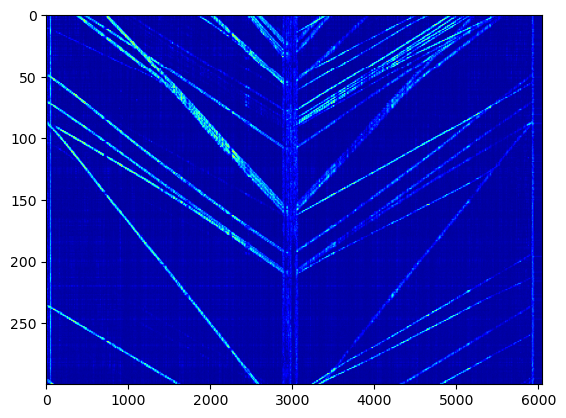

In [4]:
plt.imshow(arr, cmap='jet', aspect='auto')
plt.show()

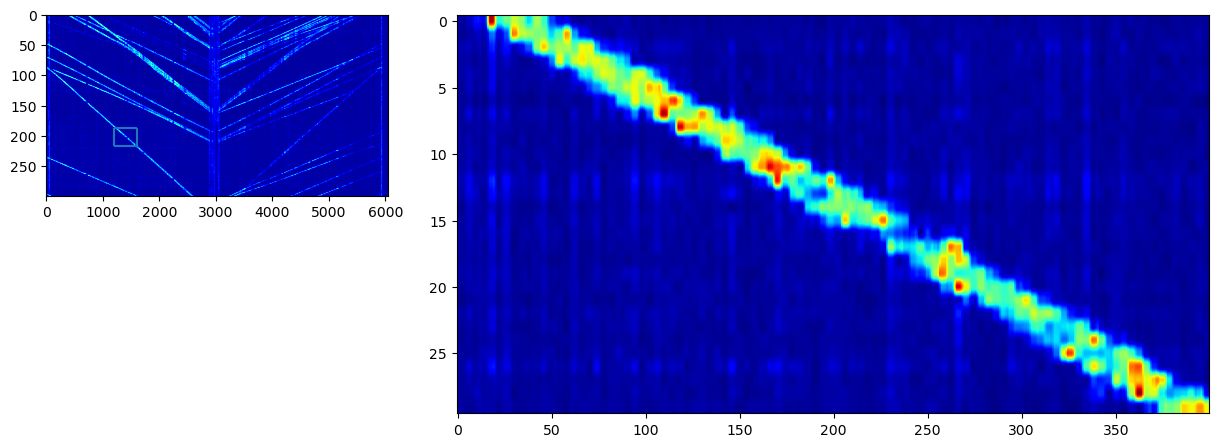

In [5]:
t = 187
b = 217
l = 1200
r = 1600
fig = plt.figure(figsize=(15, 8))
gs = fig.add_gridspec(3, 3)
ax1 = fig.add_subplot(gs[0, 0])
ax1.hlines(t, l, r)
ax1.hlines(b, l, r)
ax1.vlines(l, t, b)
ax1.vlines(r, t, b)
ax1.imshow(arr, cmap='jet', aspect='auto')
ax2 = fig.add_subplot(gs[:2, 1:])
piece = arr[t:b, l:r]
ax2.imshow(piece, cmap='jet', aspect='auto')


In [6]:
def fun(i):
    plt.figure(figsize=(10, 4))
    plt.plot(piece[i], 'o--', markersize=2)
    plt.ylim([0, 1.5])

interact(fun, i=IntSlider(0, max=28))

interactive(children=(IntSlider(value=0, description='i', max=28), Output()), _dom_classes=('widget-interact',…

<function __main__.fun(i)>

In [7]:
def fun1(i):
    plt.plot(piece[:, i], 'o--', markersize=3)
    plt.ylim([0, 1.5])

interact(fun1, i=IntSlider(0, max=399, step=3))

interactive(children=(IntSlider(value=0, description='i', max=399, step=3), Output()), _dom_classes=('widget-i…

<function __main__.fun1(i)>

In [8]:
126-57

69

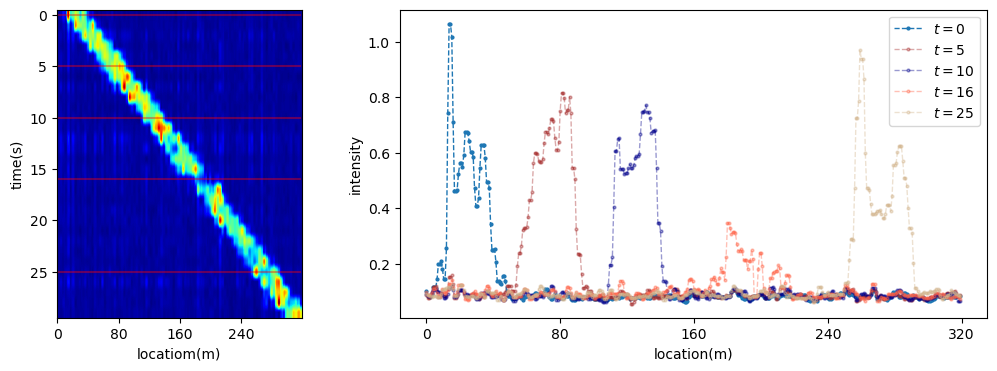

In [9]:
fig = plt.figure(figsize=(12, 4))
gs = fig.add_gridspec(1, 3, wspace=.4)
ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(piece, cmap='jet', aspect='auto')
ax1.set_ylabel("time(s)")
ax1.set_xlabel("locatiom(m)")
x = np.arange(0, 400, 100) * 0.8
x = x.astype(int)
ax1.set_xticks(np.arange(0, 400, 100), x)
rows = [0, 5, 10, 16, 25]
for r in rows:
    ax1.hlines(r, 0, 399, color='red', alpha=0.4)
    
ax2 = fig.add_subplot(gs[0, 1:])
ax2.plot(piece[0], 'o--', markersize=2, linewidth=1, label="$t=0$")
colors = ['Brown','DarkBlue','Tomato', 'Tan']
for i, r in enumerate(rows[1:]):
    ax2.plot(piece[r], 'o--', color=colors[i], markersize=2, linewidth=1, alpha=.4, label=f"$t={r}$")
ax2.legend(loc="best")
ax2.set_ylabel("intensity")
ax2.set_xlabel("location(m)")
# ax2.set_xlim([0, 450])
x = np.arange(0, 450, 100)*.8
x = x.astype(int)
ax2.set_xticks(np.arange(0, 450, 100), x)
plt.savefig("truck_wave.png")
plt.show()

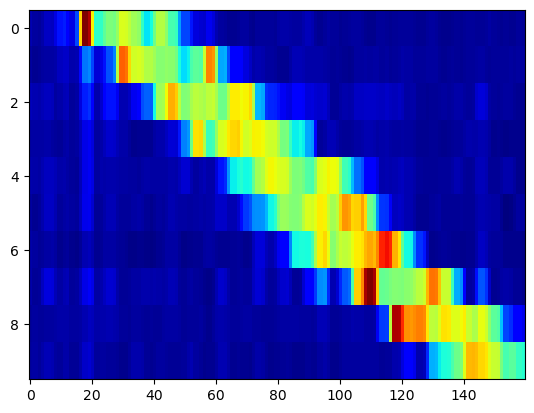

In [10]:
block = piece[0:10, :160]
plt.imshow(block, cmap='jet', aspect='auto')

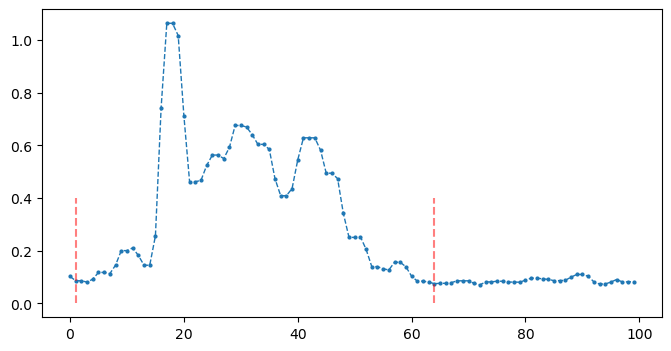

In [11]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot()
wave = piece[0, :100]
ax.plot(wave, 'o--', markersize=2, linewidth=1)
ax.vlines(1, 0, 0.4, linestyles='--', color='red', alpha=.5)
ax.vlines(64, 0, 0.4, linestyles='--', color='red', alpha=.5)

In [13]:
def fun1(i):
    sig = piece[i]
    win = signal.windows.hamming(M=120)
    f = np.convolve(sig, win, mode="same") / sum(win)
    peaks, _ = signal.find_peaks(f, prominence=0.05)
    pro = signal.peak_prominences(f, peaks)
    plt.plot(peaks, f[peaks], 'x', markersize=10)
    print(peaks)
    print(pro)
    plt.plot(sig, 'o--', markersize=3)
    plt.plot(f, 'o--', markersize=2, linewidth=2)
    plt.ylim([0, 1.5])
    plt.show()

interact(fun1, i=IntSlider(1, max=29))

interactive(children=(IntSlider(value=1, description='i', max=29), Output()), _dom_classes=('widget-interact',…

<function __main__.fun1(i)>